### 1. Testing if two graphs are isomorphic

Returns True if the graphs G1 and G2 are isomorphic and False otherwise.

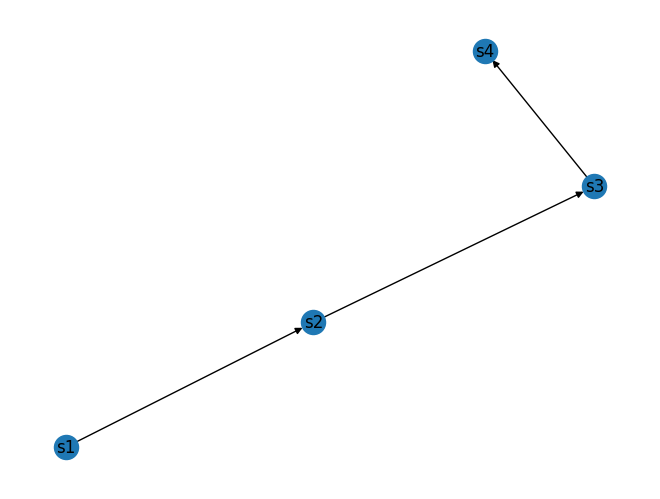

In [23]:
import networkx as nx

G1, G2 = nx.DiGraph(), nx.DiGraph()
G1.add_edges_from([("s1", "s2"), ("s2", "s3"), ("s3", "s4")]) # G1: 1->2->3->4
G2.add_edges_from([("s1", "s2"), ("s2", "s3"), ("s3", "s7")]) # G2: 1->2->3->7

nx.draw(G1, with_labels = True)


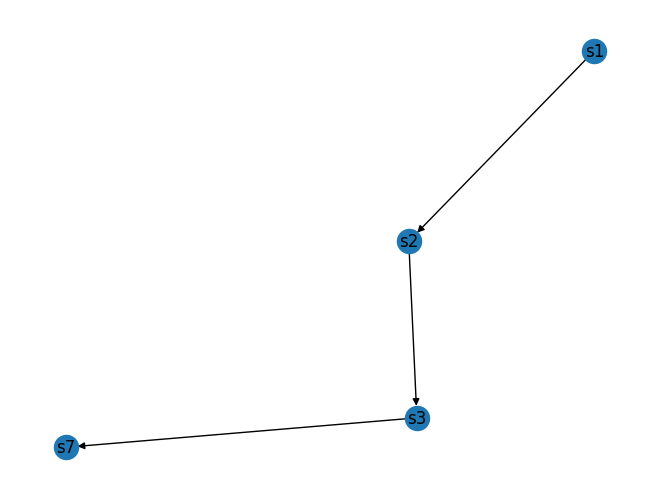

In [24]:
nx.draw(G2, with_labels = True)

In [25]:
nx.is_isomorphic(G1, G2)

True

#### 1.1. Uses the vf2 algorithm (An implementation of VF2 algorithm for graph ismorphism testing.)

[L. P. Cordella, P. Foggia, C. Sansone, M. Vento, “An Improved Algorithm for Matching Large Graphs”, 3rd IAPR-TC15 Workshop on Graph-based Representations in Pattern Recognition, Cuen, pp. 149-159, 2001.]



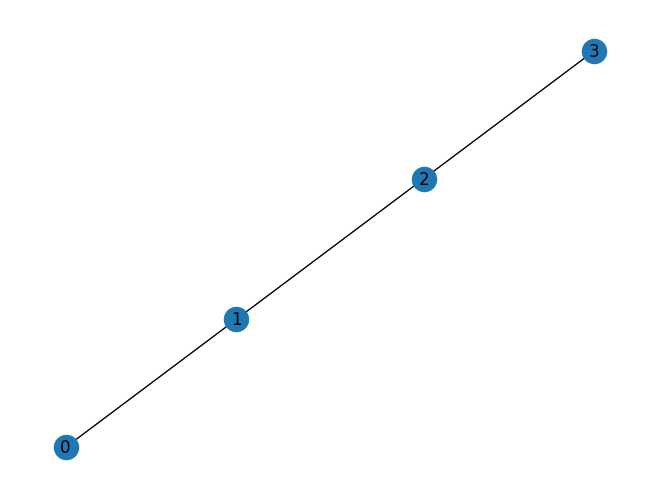

In [26]:
#Create graph G1 and G2

from networkx.algorithms import isomorphism
G1 = nx.path_graph(4)
G2 = nx.path_graph(4)

nx.draw(G1, with_labels = True)



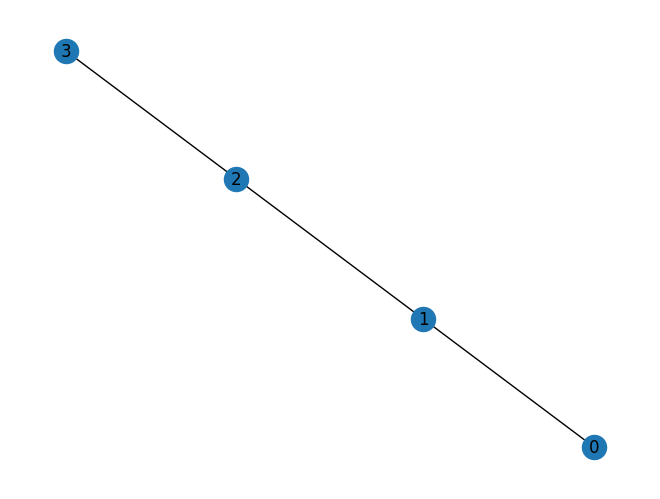

In [27]:
nx.draw(G2, with_labels = True)

In [28]:
GM = isomorphism.GraphMatcher(G1,G2)
GM.is_isomorphic()

True

In [29]:
GM.mapping

{0: 0, 1: 1, 2: 2, 3: 3}

#### 1.2. Suppose G1 and G2 are isomorphic directed graphs. Verification is as follows:

In [7]:
G1 = nx.path_graph(4, create_using=nx.DiGraph())
G2 = nx.path_graph(4, create_using=nx.DiGraph())
DiGM = isomorphism.DiGraphMatcher(G1,G2)
DiGM.is_isomorphic()

True

#### DiGM.mapping stores the isomorphism mapping from G1 to G2.


In [30]:
DiGM.mapping

{0: 0, 1: 1, 2: 2, 3: 3}

#### 1.3. Label attributes comparision: During comparison, node attributes are compared. 

By default, node attributes are a blank dictionary (and do not incorporate node label information). 

A quick way to fix that is to use nx.convert_node_labels_to_integers and specify the key for label attributes:

In [3]:
G1_int = nx.convert_node_labels_to_integers(G1, label_attribute='label')
G2_int = nx.convert_node_labels_to_integers(G2, label_attribute='label')
print(G1_int.nodes[0])
# {'label': 's1'}

{'label': 's1'}


In [4]:
nx.is_isomorphic(G1_int, G2_int, node_match = lambda x,y: x==y)
# False 

False

#### 1.4. Search for a subgraph of G2 that is isomorphic to G1. (Finding multiple subgraphs)

In [18]:
import networkx as nx
import networkx.algorithms.isomorphism as iso


G1 = nx.Graph()
G1.add_edges_from([(1,2)])


G2 = nx.Graph()
G2.add_edges_from([(1,2), (2,3), (3,4)])


In [20]:
# Search for a subgraph of G2 that is isomorphic to G1.
GM = iso.GraphMatcher(G2,G1)
for mapping in GM.subgraph_isomorphisms_iter():
    print(mapping)

{1: 1, 2: 2}
{2: 1, 1: 2}
{2: 1, 3: 2}
{3: 1, 2: 2}
{3: 1, 4: 2}
{4: 1, 3: 2}


### 1.5. Using GraphMatcher to find a subgraph in Karate network

Modify the GraphMatcher class so that subgraph_is_isomorphic() will determine whether G2 is a subgraph (with
an identity isomorphism).

In [57]:
class GraphMatcher(nx.algorithms.isomorphism.GraphMatcher):
    def semantic_feasibility(self, G1_node, G2_node):
        return G1_node == G2_node

In [59]:
import networkx as nx

G = nx.karate_club_graph()

# Grab a subgraph.
subG_good = G.subgraph(range(10))

    
# Make an isomorphic subgraph.
subG_bad = nx.relabel_nodes(subG_good, dict(zip(range(10), 'abcdefghij')))

gm = GraphMatcher(G,subG_good)
gm.subgraph_is_isomorphic()


True

In [62]:
gm = GraphMatcher(G,subG_bad)
gm.subgraph_is_isomorphic()


False

### 2. gSpan method

In [64]:
!pip install gspan-mining

#### Import libraries

In [65]:
from gspan_mining.config import parser
from gspan_mining.main import main

#### Fiding a subgraph with min support (-s 2) and minimal of nodes in the subgraph (-l 3)

Read graph data from ./graphdata/graph.data, mine undirected subgraphs given min support


[Data File Format: gSpan/graphdata/

"t # N" means the Nth graph,

"v M L" means that the Mth vertex in this graph has label L,

"e P Q L" means that there is an edge connecting the Pth vertex with the Qth vertex. The edge has label L.]



In [66]:
args_str = '-s 2 -l 3 -p True ./graphdata/sample_data4'
FLAGS, _ = parser.parse_known_args(args=args_str.split())

#### Getting all the subgraph with minimal support

t # 0
v 0 A
v 1 B
v 2 C
e 0 1 1
e 1 2 1

Support: 3


C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


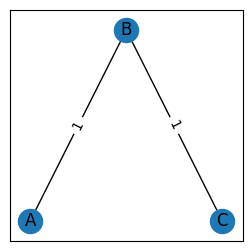


-----------------

t # 1
v 0 A
v 1 B
v 2 C
e 0 1 1
e 0 2 1
e 1 2 1

Support: 2


C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


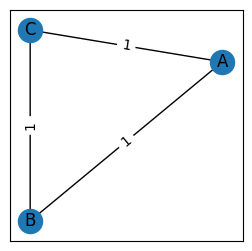


-----------------

t # 2
v 0 A
v 1 B
v 2 C
v 3 A
e 0 1 1
e 1 2 1
e 2 3 1

Support: 2


C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


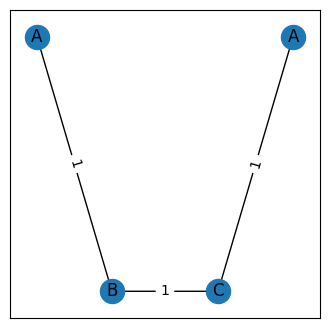


-----------------

t # 3
v 0 A
v 1 B
v 2 A
e 0 1 1
e 1 2 1

Support: 3


C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


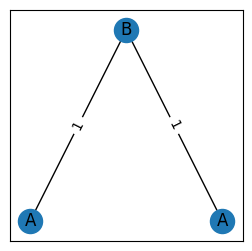

C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(



-----------------

t # 4
v 0 A
v 1 B
v 2 A
v 3 C
e 0 1 1
e 1 2 1
e 1 3 1

Support: 3


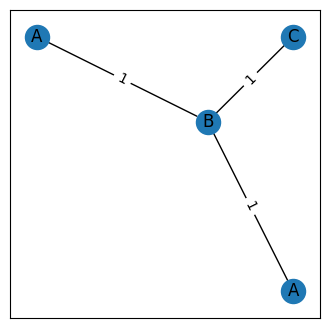

C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(



-----------------

t # 5
v 0 A
v 1 B
v 2 A
v 3 C
e 0 1 1
e 1 2 1
e 2 3 1

Support: 2


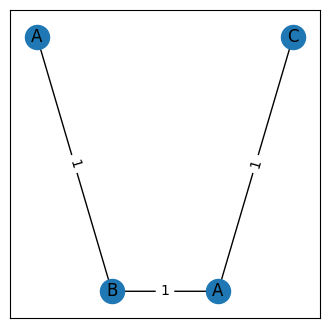

C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(



-----------------

t # 6
v 0 A
v 1 B
v 2 A
v 3 C
e 0 1 1
e 1 2 1
e 1 3 1
e 2 3 1

Support: 2


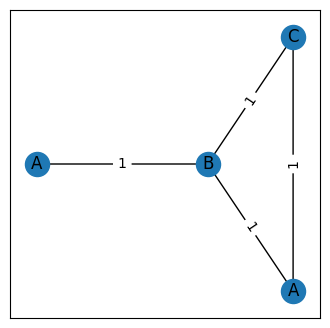

C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(



-----------------

t # 7
v 0 A
v 1 B
v 2 C
e 0 1 1
e 0 2 1

Support: 2


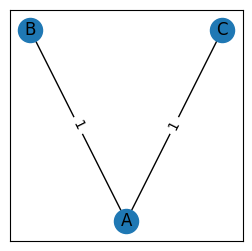


-----------------

t # 8
v 0 A
v 1 A
v 2 B
e 0 1 1
e 1 2 1

Support: 3


C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


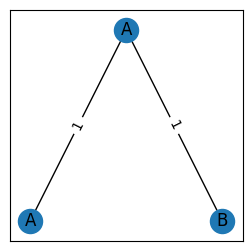

C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(



-----------------

t # 9
v 0 A
v 1 A
v 2 B
e 0 1 1
e 0 2 1
e 1 2 1

Support: 3


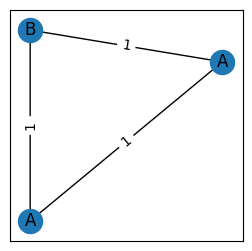


-----------------

t # 10
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 0 2 1
e 1 2 1
e 2 3 1

Support: 3


C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


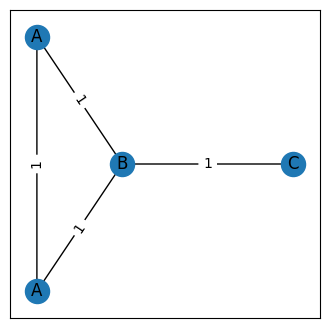


-----------------

t # 11
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 0 2 1
e 0 3 1
e 1 2 1
e 2 3 1

Support: 2


C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


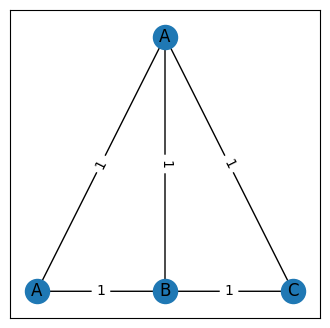


-----------------

t # 12
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 0 2 1
e 1 2 1
e 1 3 1

Support: 2


C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


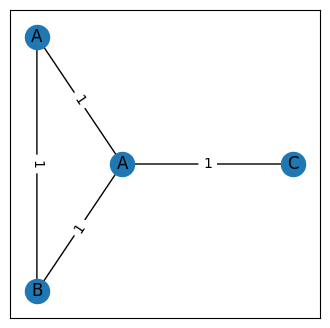

C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(



-----------------

t # 13
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 1 2 1
e 2 3 1

Support: 3


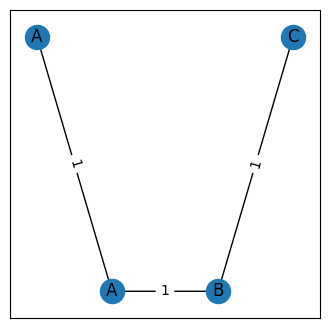


-----------------

t # 14
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 0 3 1
e 1 2 1
e 2 3 1

Support: 2


C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


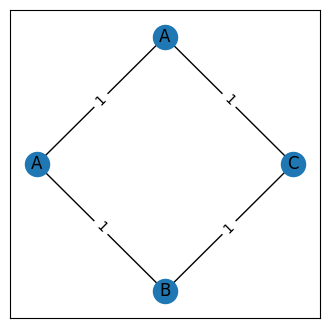


-----------------

t # 15
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 1 2 1
e 1 3 1
e 2 3 1

Support: 2


C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


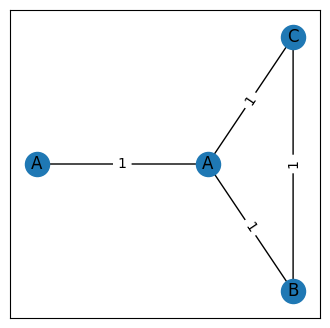

C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(



-----------------

t # 16
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 1 2 1
e 1 3 1

Support: 2


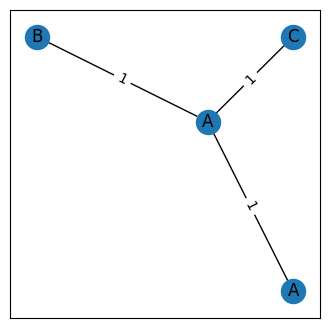

C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(



-----------------

t # 17
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 0 3 1
e 1 2 1

Support: 2


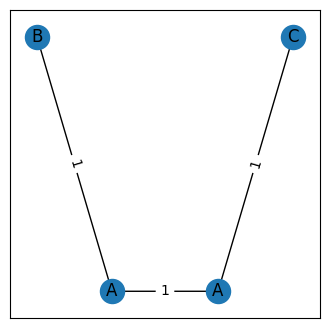

C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(



-----------------

t # 18
v 0 A
v 1 A
v 2 C
e 0 1 1
e 1 2 1

Support: 2


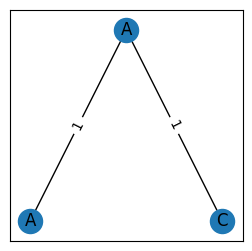


-----------------

t # 19
v 0 A
v 1 A
v 2 C
v 3 B
e 0 1 1
e 1 2 1
e 2 3 1

Support: 2


C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


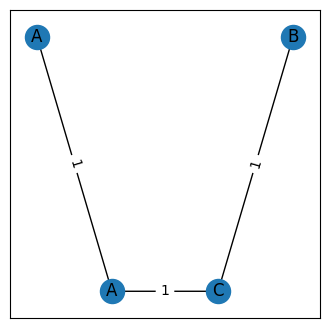

C:\Users\user\anaconda3\envs\test\lib\site-packages\gspan_mining\gspan.py:336: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(



-----------------

t # 20
v 0 A
v 1 C
v 2 B
e 0 1 1
e 1 2 1

Support: 2


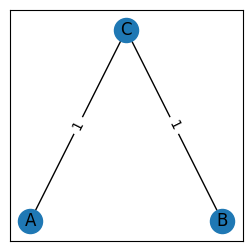


-----------------

Read:	0.0 s
Mine:	2.0 s
Total:	2.0 s


In [67]:
gs = main(FLAGS)
print(gs)